# Python for data analysis
### Dataset: YearPredictionMSD.txt

#### 10 janvier 2021 Michel Fuvel IBO 2

### Imports

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import numpy as np

import joblib

### Load the raw data.

In [5]:
num_attributes = 90
names = ['Year'] + ['Attr_{}'.format(i) for i in range(num_attributes)]
df = pd.read_csv('YearPredictionMSD.txt', header=None, names=names)

In [6]:
df.shape

(515345, 91)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515345 entries, 0 to 515344
Data columns (total 91 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Year     515345 non-null  int64  
 1   Attr_0   515345 non-null  float64
 2   Attr_1   515345 non-null  float64
 3   Attr_2   515345 non-null  float64
 4   Attr_3   515345 non-null  float64
 5   Attr_4   515345 non-null  float64
 6   Attr_5   515345 non-null  float64
 7   Attr_6   515345 non-null  float64
 8   Attr_7   515345 non-null  float64
 9   Attr_8   515345 non-null  float64
 10  Attr_9   515345 non-null  float64
 11  Attr_10  515345 non-null  float64
 12  Attr_11  515345 non-null  float64
 13  Attr_12  515345 non-null  float64
 14  Attr_13  515345 non-null  float64
 15  Attr_14  515345 non-null  float64
 16  Attr_15  515345 non-null  float64
 17  Attr_16  515345 non-null  float64
 18  Attr_17  515345 non-null  float64
 19  Attr_18  515345 non-null  float64
 20  Attr_19  515345 non-null  

In [8]:
#On définit x --> sans la colonne Year
x = df.iloc[:,1:]
x.head()

,Attr_0,Attr_1,Attr_2,Attr_3,Attr_4,Attr_5,Attr_6,Attr_7,Attr_8,Attr_9,...,Attr_80,Attr_81,Attr_82,Attr_83,Attr_84,Attr_85,Attr_86,Attr_87,Attr_88,Attr_89
0,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [9]:
# Exportations des colonnes de la df de X pour l'api
model_columns = list(x.columns)
joblib.dump(model_columns, 'model_columns.pkl')

['model_columns.pkl']

In [10]:
# On définit y ce qu'on doit prédire --> Year
y= df["Year"]
y.head()

0    2001
1    2001
2    2001
3    2001
4    2001
Name: Year, dtype: int64

In [11]:
y = y-y.min()

In [12]:
# Division de la dataset en train et test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123) #20% test, 80% train

In [13]:
# On scale le DataSet
from sklearn import preprocessing
mm_scaler = preprocessing.MinMaxScaler()
X_train = mm_scaler.fit_transform(x_train)
X_test = mm_scaler.transform(x_test)

### Data-visualisation

In [14]:
nsongs = {}
for y in range(1922,2012):
    nsongs[y] = len(df[df.Year==y])
    print("Year=%d, nsongs=%d" % (y, nsongs[y]))

Year=1922, nsongs=6
Year=1923, nsongs=0
Year=1924, nsongs=5
Year=1925, nsongs=7
Year=1926, nsongs=19
Year=1927, nsongs=42
Year=1928, nsongs=52
Year=1929, nsongs=93
Year=1930, nsongs=40
Year=1931, nsongs=35
Year=1932, nsongs=11
Year=1933, nsongs=6
Year=1934, nsongs=29
Year=1935, nsongs=24
Year=1936, nsongs=25
Year=1937, nsongs=28
Year=1938, nsongs=19
Year=1939, nsongs=35
Year=1940, nsongs=52
Year=1941, nsongs=32
Year=1942, nsongs=24
Year=1943, nsongs=14
Year=1944, nsongs=15
Year=1945, nsongs=30
Year=1946, nsongs=29
Year=1947, nsongs=57
Year=1948, nsongs=43
Year=1949, nsongs=60
Year=1950, nsongs=83
Year=1951, nsongs=74
Year=1952, nsongs=77
Year=1953, nsongs=133
Year=1954, nsongs=123
Year=1955, nsongs=275
Year=1956, nsongs=565
Year=1957, nsongs=597
Year=1958, nsongs=583
Year=1959, nsongs=592
Year=1960, nsongs=424
Year=1961, nsongs=571
Year=1962, nsongs=605
Year=1963, nsongs=902
Year=1964, nsongs=945
Year=1965, nsongs=1120
Year=1966, nsongs=1377
Year=1967, nsongs=1718
Year=1968, nsongs=186

In [15]:
type(df["Year"][0])

numpy.int64

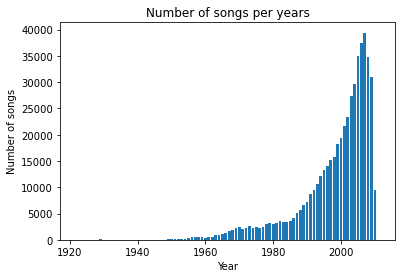

In [16]:
import matplotlib.pyplot as plt

years = range(1922,2012)
values = [nsongs[y] for y in years]
plt.bar(years, values, align='center')
plt.xlabel("Year")
plt.ylabel("Number of songs")
plt.title("Number of songs per years")
plt.show()

/Users/mikelfuvel/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


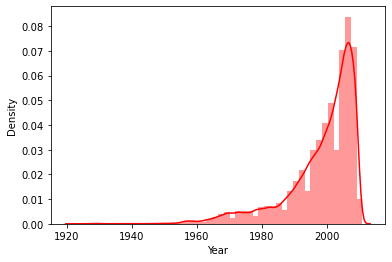

In [19]:
sns.distplot(df.Year, color='red', kde=True);

(Year, Features) (515345, 1)


,Year
count,515345.000000
mean,1998.397082
std,10.931046
min,1922.000000
25%,1994.000000
50%,2002.000000
75%,2006.000000
max,2011.000000


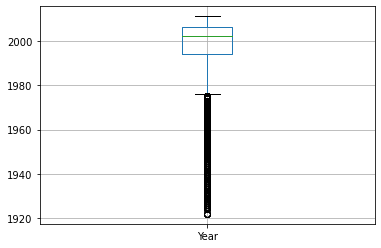

In [20]:
boxplot = df.boxplot(column=['Year'])
boxplot

print("(Year, Features) {}".format(df.iloc[:,:1].shape))
df.iloc[:,:1].describe()

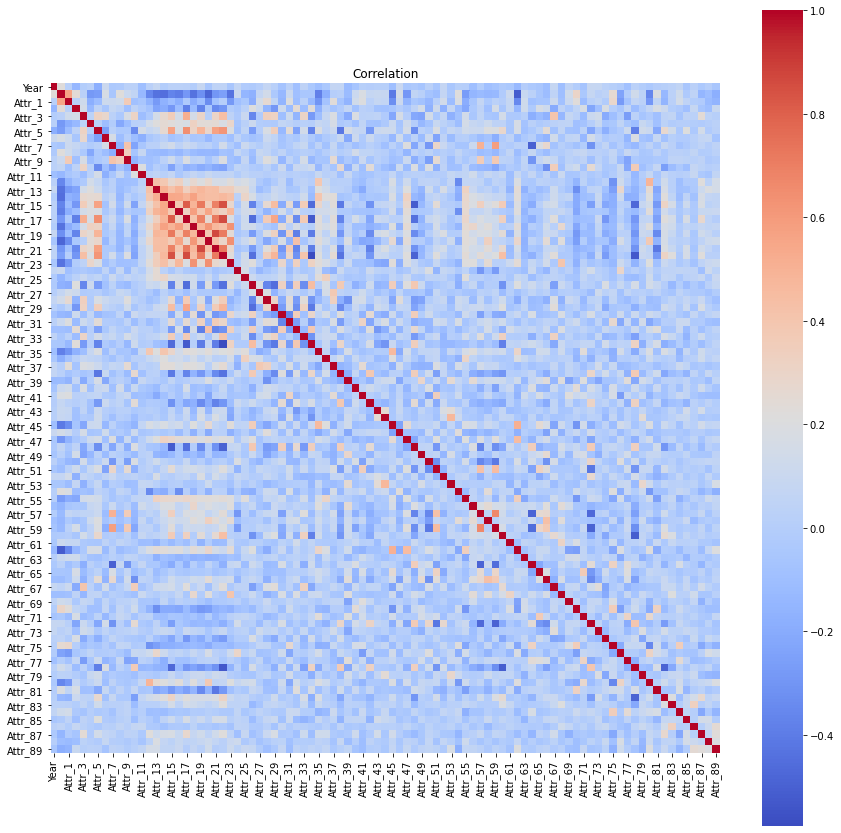

In [18]:
import seaborn as sns

corr = df.iloc[:,:].corr()
fig, ax = plt.subplots(figsize=(15,15)) 
plt.title("Correlation")
sns.heatmap(corr, square=True, cmap='coolwarm', annot=False)
plt.show()

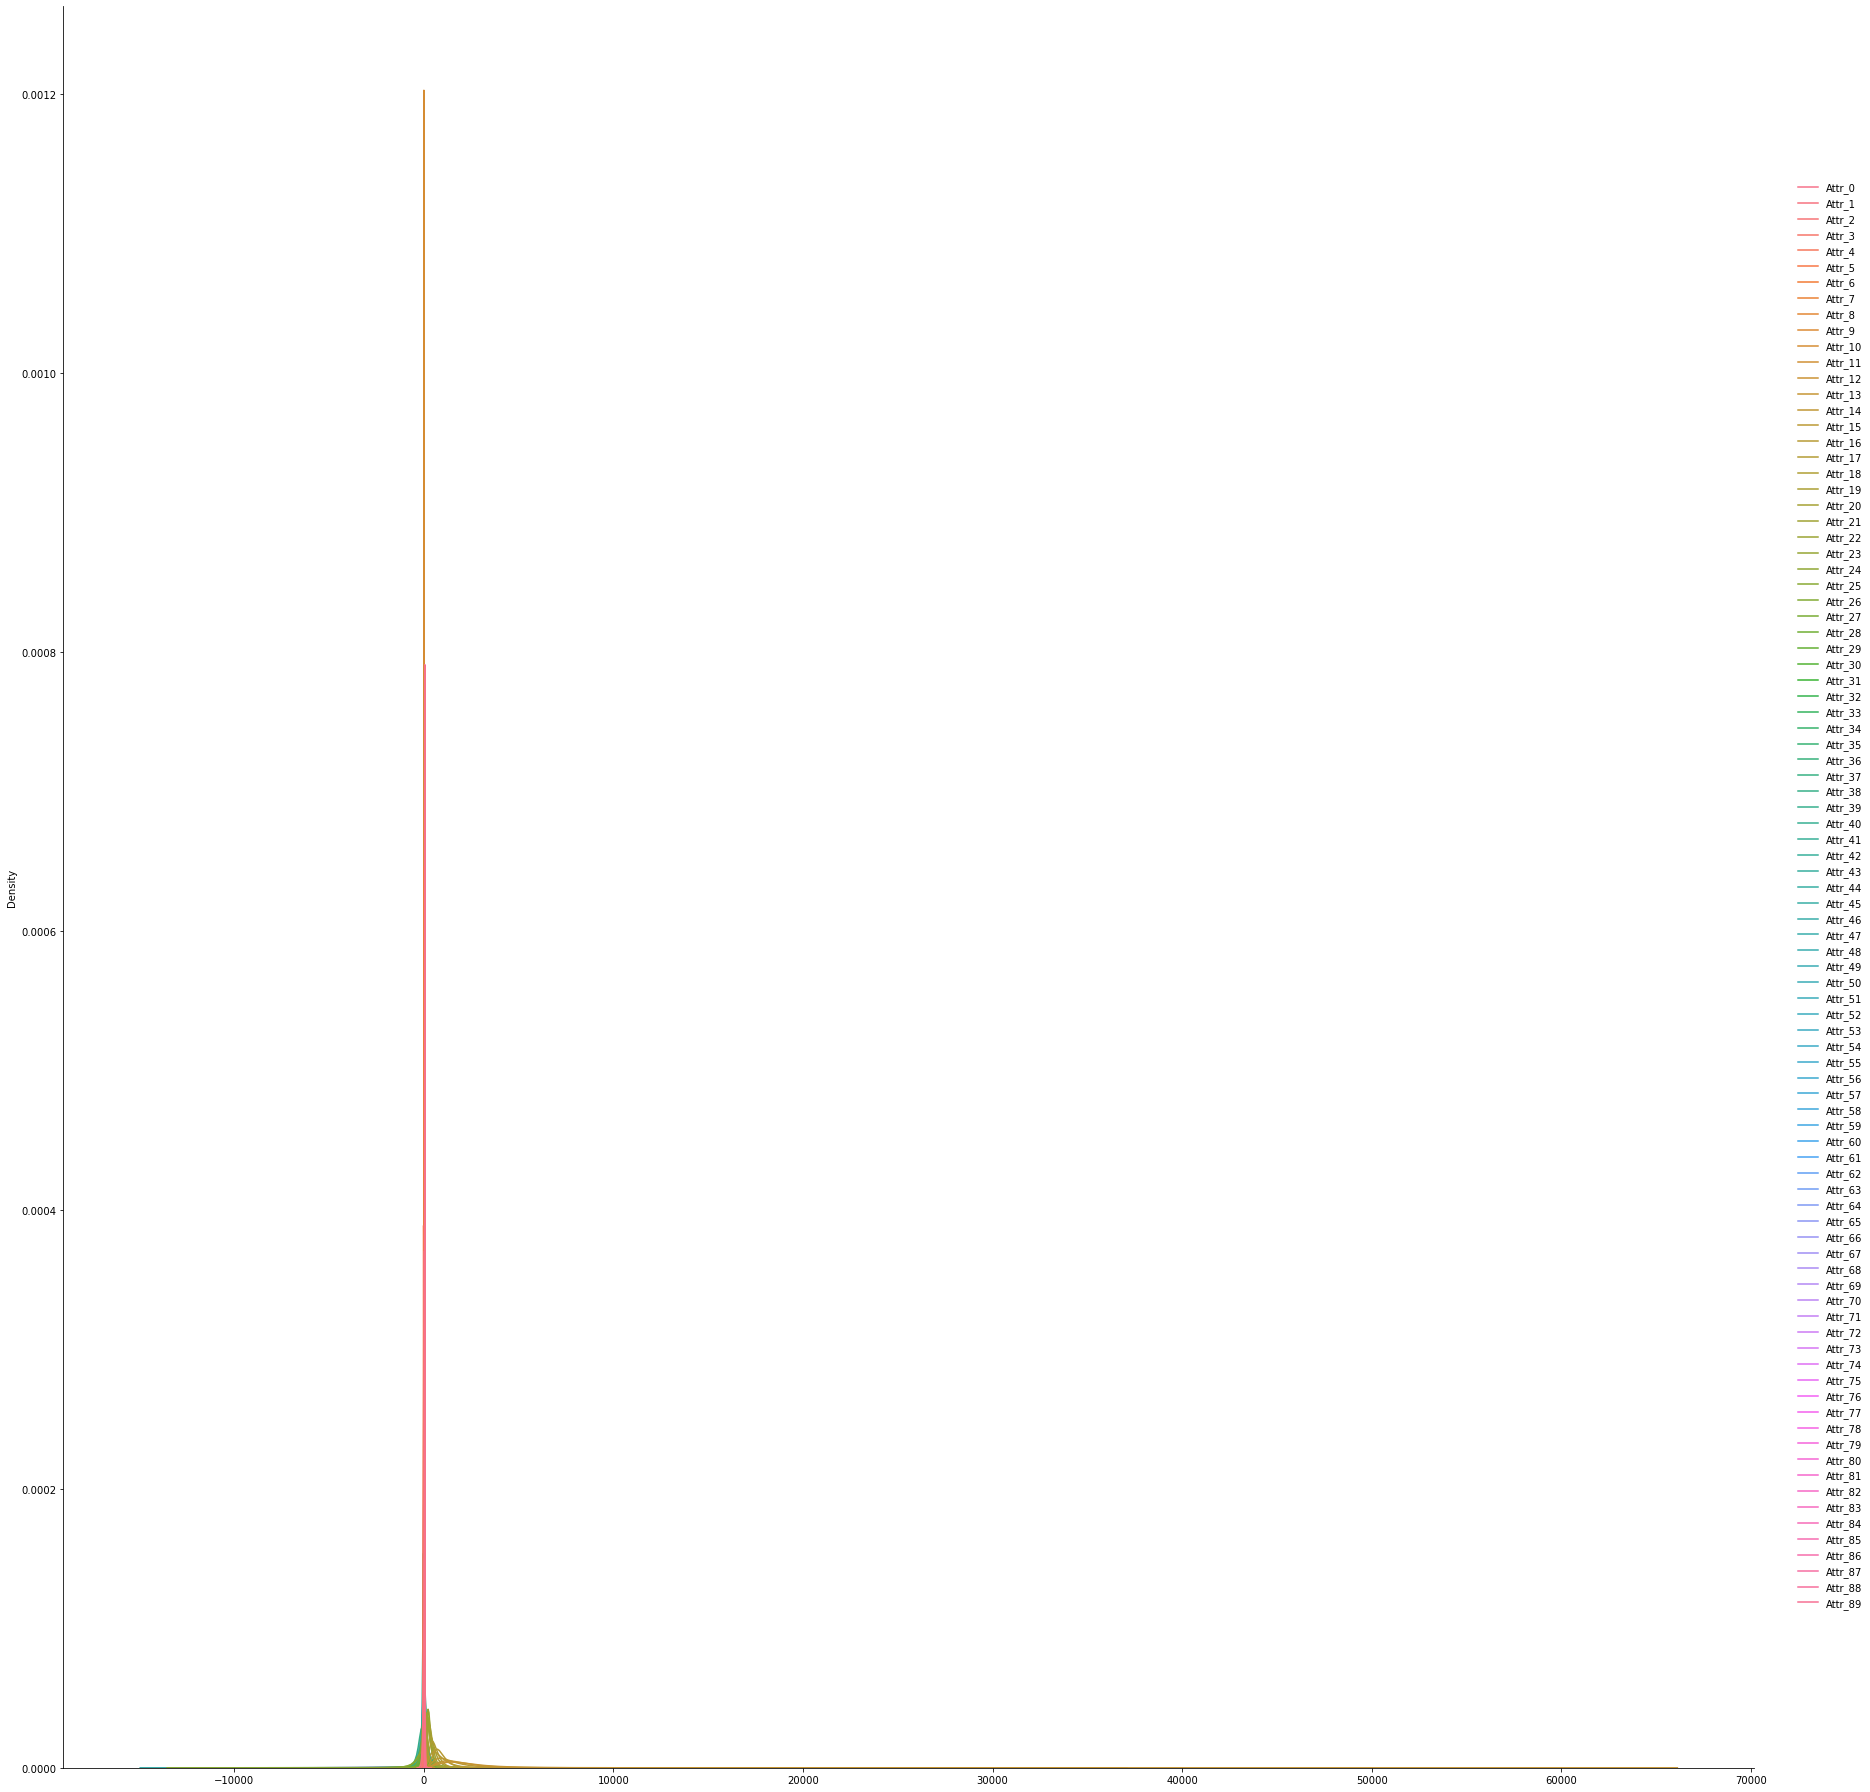

In [21]:
sns.displot(df.iloc[:,1:],kind="kde",height=25)

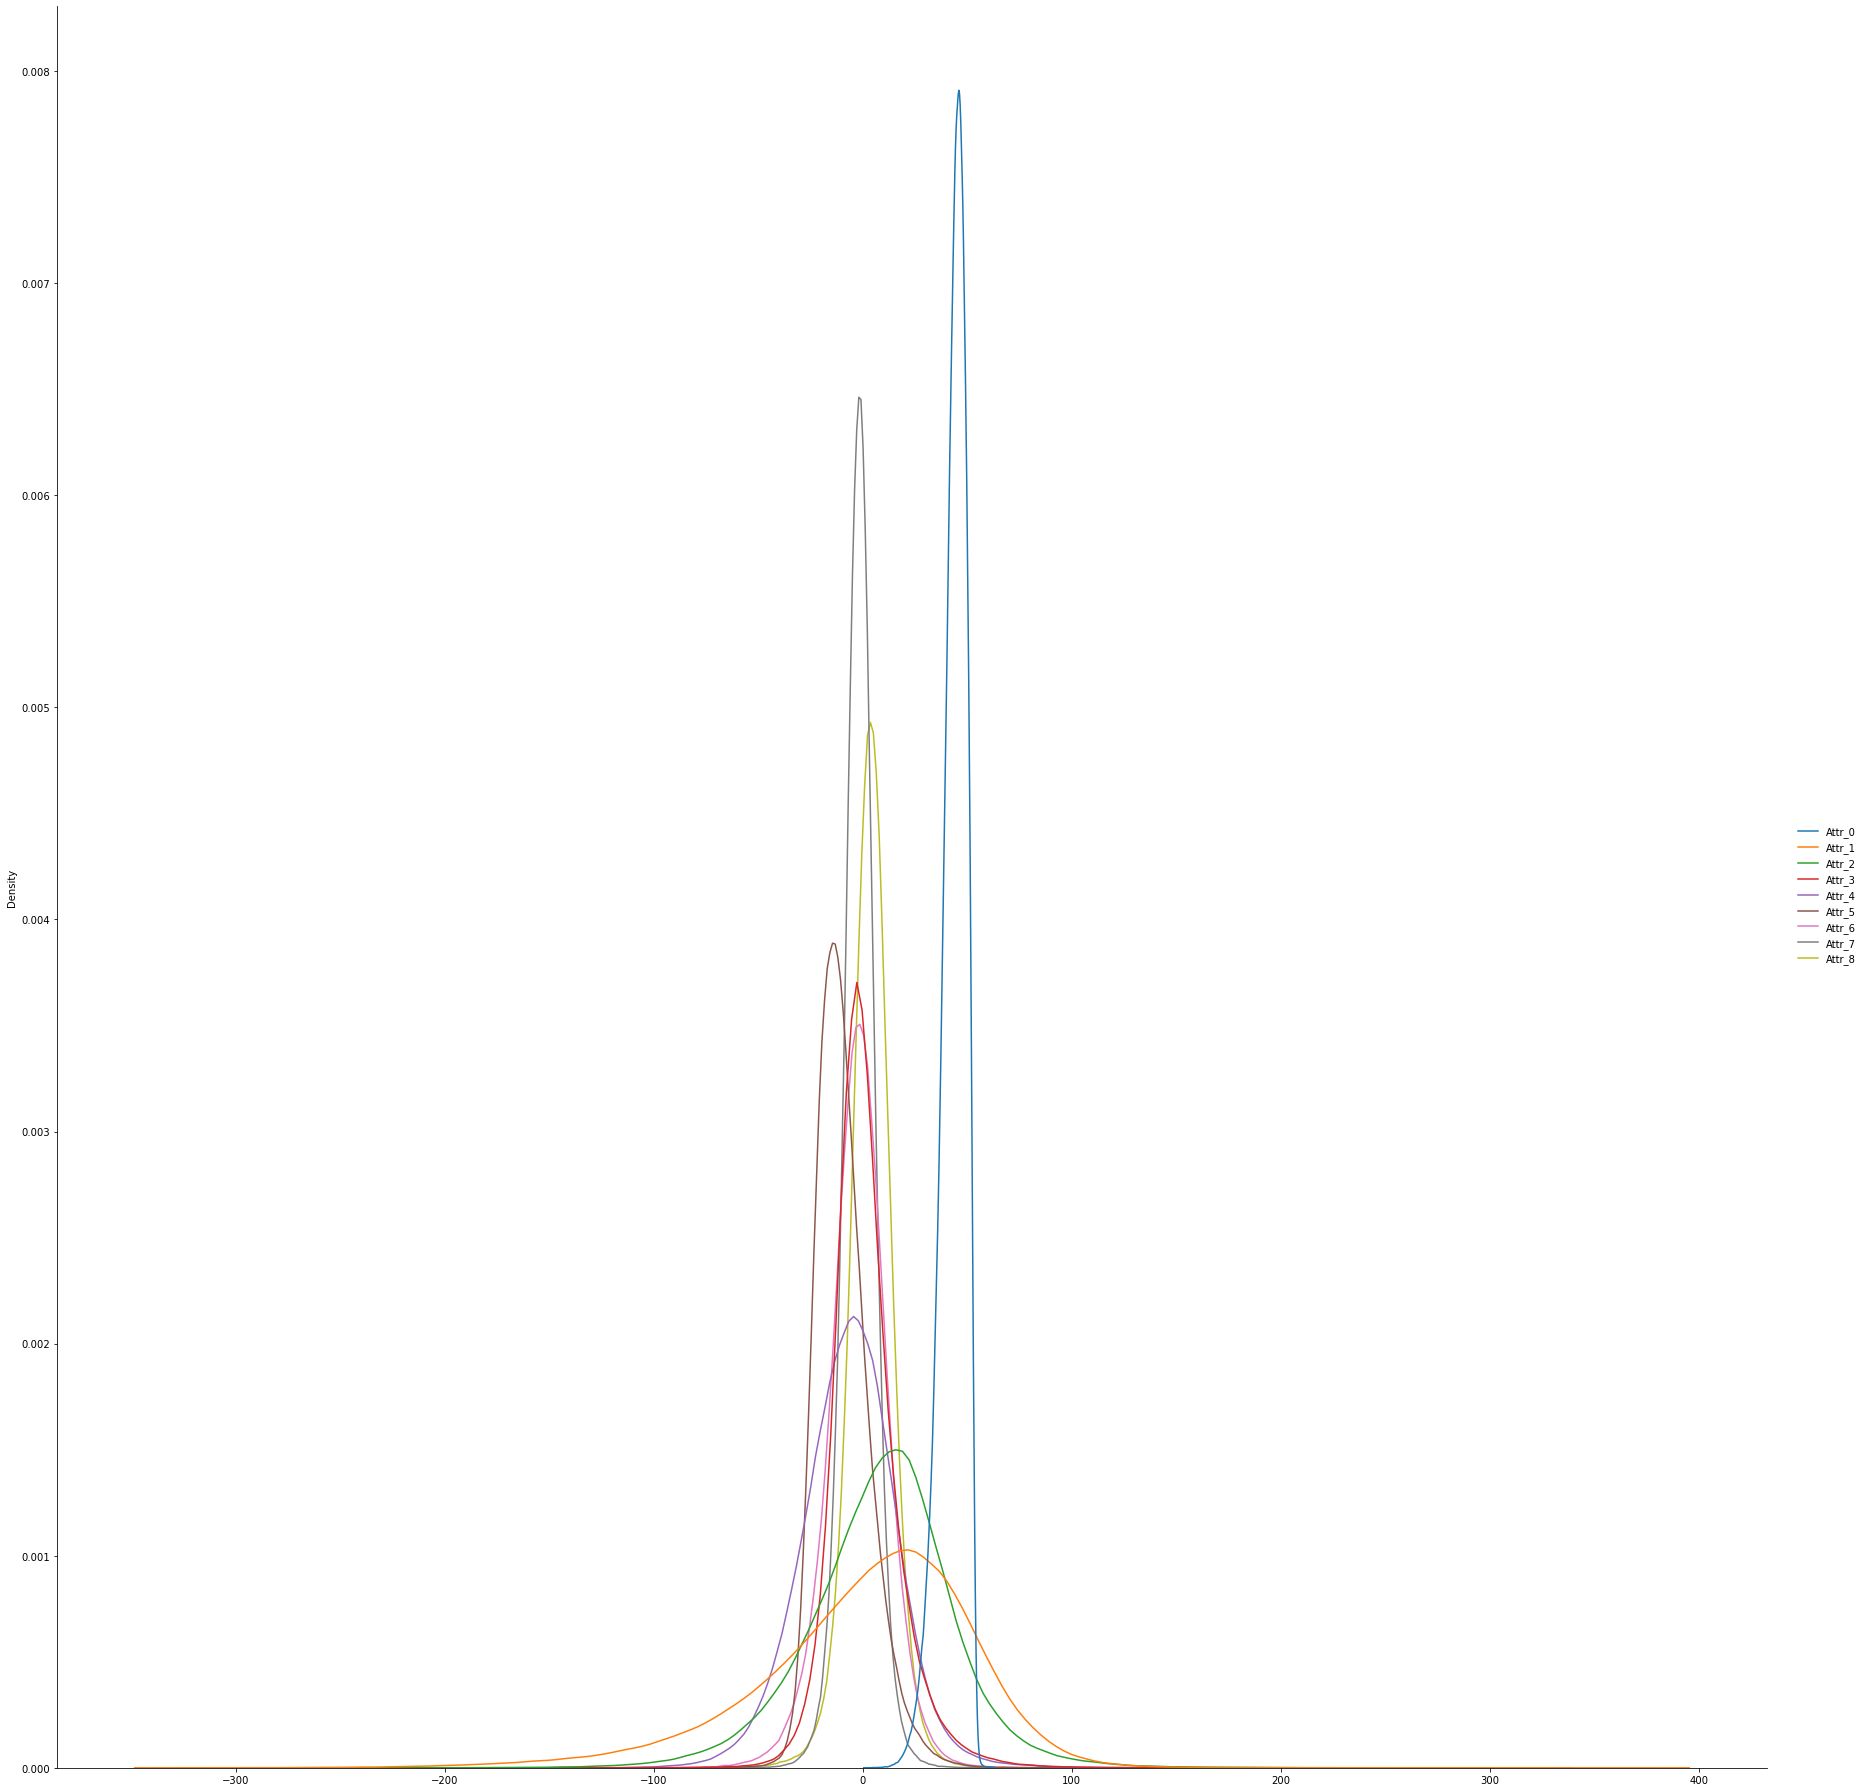

In [67]:
sns.displot(df.iloc[:,1:10],kind="kde",height=25)

In [50]:
#pip install np_utils

In [19]:
#pip install tensorflow

In [20]:
#pip install keras

In [21]:
#pip install np_utils

### Modélisation

In [84]:
#Modele Linear Regression (merde que 23%)

from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
reg.score(x_test, y_test)

0.23988906124412013

In [85]:
y_pred = reg.predict(x_test)

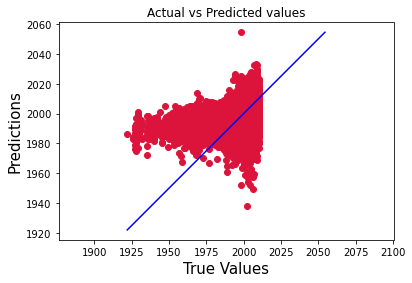

In [86]:
import matplotlib.pyplot as plt
# Plot outputs
plt.scatter(y_test, y_pred, c='crimson')
#plt.scatter(x_train, y_train, color='blue', linewidth=3)



p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.title("Actual vs Predicted values")
plt.axis('equal')
plt.show()

commentair: modele incorrect car les valeurs bien predites sont sur la ligne blue et on observe que tres peu des valeurs sont bien predites. les valeurs sont tres disopercees au tours de la ligne blue. Y_predit et Y_reel sont tres eloignes. Le modele n'est pas adapte a notre cas.

In [23]:
import tensorflow as tf
import tensorflow 

from tensorflow import keras
from keras.layers import Dense

from keras import utils as np_utils

from keras.models import Sequential

In [24]:
#Y(test and train) de 0 à 90 les annees 1922 - 2011

import numpy as np
Y_train = np_utils.to_categorical(y_train, num_attributes)
Y_test = np_utils.to_categorical(y_test, num_attributes)

In [43]:
# Reseau de Neurones

batch_size = 5000 # un tres petit pourcentage du Dataset ( 500.000 donnees )
num_epochs = 10 


model = Sequential()
model.add(Dense(input_dim=num_attributes, units=5000, activation='relu'))
model.add(Dense(units=1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
history = model.fit(X_train, Y_train, 
                    validation_data=(X_test, Y_test), 
                    batch_size=batch_size, 
                    epochs=num_epochs)

Epoch 1/10
83/83 [==============================] - 12s 132ms/step - loss: 1.2644 - accuracy: 0.8969 - val_loss: 0.0555 - val_accuracy: 0.9889
Epoch 2/10
83/83 [==============================] - 10s 122ms/step - loss: 0.0445 - accuracy: 0.9889 - val_loss: 0.0166 - val_accuracy: 0.9889
Epoch 3/10
83/83 [==============================] - 12s 143ms/step - loss: 0.0131 - accuracy: 0.9889 - val_loss: 0.0110 - val_accuracy: 0.9889
Epoch 4/10
83/83 [==============================] - 12s 145ms/step - loss: 0.0111 - accuracy: 0.9889 - val_loss: 0.0110 - val_accuracy: 0.9889
Epoch 5/10
83/83 [==============================] - 11s 131ms/step - loss: 0.0110 - accuracy: 0.9889 - val_loss: 0.0110 - val_accuracy: 0.9889
Epoch 6/10
83/83 [==============================] - 12s 139ms/step - loss: 0.0110 - accuracy: 0.9889 - val_loss: 0.0110 - val_accuracy: 0.9889
Epoch 7/10
83/83 [==============================] - 11s 134ms/step - loss: 0.0110 - accuracy: 0.9889 - val_loss: 0.0110 - val_accuracy: 0.9889

In [47]:
loss, acc = model.evaluate(x_test, Y_test, verbose=0)
print(acc)

0.934000551700592


### Transformation du modèle en API Flask

In [24]:
#API

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5") 